Dataset from Kaggle: [Car Pricing Regression](https://www.kaggle.com/datasets/amjadzhour/car-price-prediction)

In [ ]:

import kagglehub
amjadzhour_car_price_prediction_path = kagglehub.dataset_download('amjadzhour/car-price-prediction')

print('Data source import complete.')


Import needed libraries
we then have a first look at the dataset and check for missing values

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import os



df = pd.read_csv('/kaggle/input/car-price-prediction/Car_Price_Prediction.csv')

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


,0
Make,0
Model,0
Year,0
Engine Size,0
Mileage,0
Fuel Type,0
Transmission,0
Price,0


No Missing Values, but we will have to preprocess some of the features

In [ ]:
categorical_features = ['Make', 'Model', 'Fuel Type', 'Fuel Type', 'Transmission']

df_processed = pd.get_dummies(df, columns = categorical_features, drop_first = True)

df_processed.head()



We will now split the dataset into X and y with y being the 'price' as we want to predict price, there will be 2 routes we will go with:


*   Random train_test_split: we split the dataset randomly
*   Split by time: we will use the data from the model before 2019 to predict the price of the later model

Each we will be using 2 models:


*   Linear Regression model: baseline
*   Random Forest Regressor model






In [ ]:
X = df_processed.drop(columns = 'Price', axis = 1)
y = df_processed['Price']



Mean Squared Error:  2237.29
Mean Absolute Error:  1810.55
r2 Score: 0.79


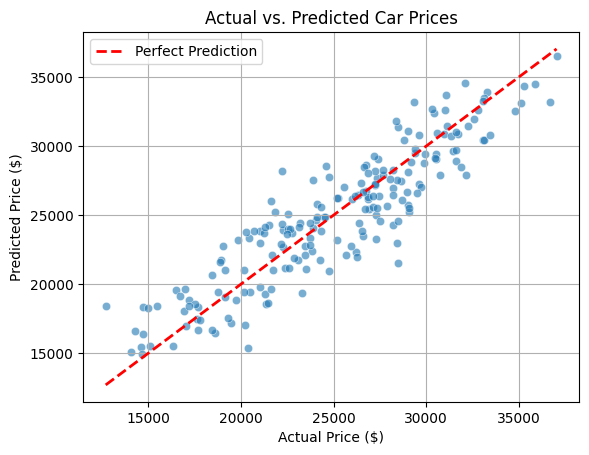

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

linear_model = LinearRegression(n_jobs = -1)

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
lin_pred = y_pred

rmse = root_mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f"Mean Squared Error: {rmse: .2f}")

print(f"Mean Absolute Error: {mae: .2f}"  )

print(f"r2 Score: {r2:.2f}")

sns.scatterplot(x=y_test, y=lin_pred, alpha=0.6)

# Add a line for perfect predictions (where predicted price equals actual price)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2, label='Perfect Prediction')

# Set labels and title for clarity
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs. Predicted Car Prices')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

Mean Squared Error:  2381.38
Mean Absolute Error:  1931.80
r2 Score: 0.76


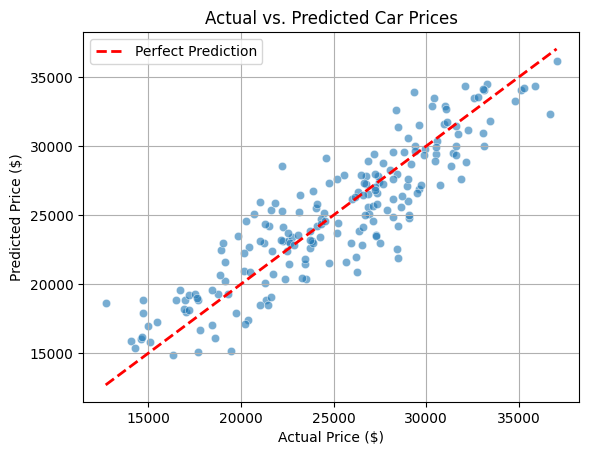

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for_model = RandomForestRegressor(random_state = 42, n_jobs = -1)

for_model.fit(X_train, y_train)

for_pred = for_model.predict(X_test)

rmse = root_mean_squared_error(for_pred, y_test)
mae = mean_absolute_error(for_pred, y_test)
r2 = r2_score(for_pred, y_test)

print(f"Mean Squared Error: {rmse: .2f}")

print(f"Mean Absolute Error: {mae: .2f}"  )

print(f"r2 Score: {r2:.2f}")

sns.scatterplot(x=y_test, y=for_pred, alpha=0.6)

# Add a line for perfect predictions (where predicted price equals actual price)
# This helps to visually assess the accuracy of the model.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2, label='Perfect Prediction')

# Set labels and title for clarity
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs. Predicted Car Prices')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



Here's the second route we go with (The splitting by time)

In [ ]:
df_sorted = df_processed.sort_values('Year')
X = df_sorted.drop('Price', axis = 1)
y = df_sorted['Price']

split = 2019
X_train = X[X['Year'] < 2019]
y_train = y[X['Year'] < 2019]

X_test = X[X['Year'] >= 2019]
y_test = y[X['Year'] >= 2019]





Mean Squared Error:  2320.18
Mean Absolute Error:  1826.98
r2 Score: 0.54


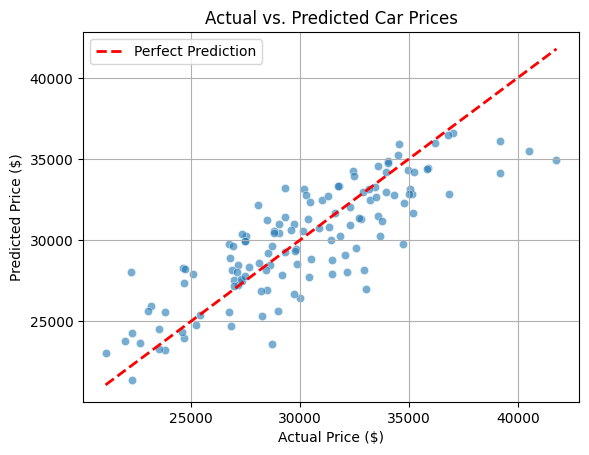

In [ ]:
linear_model = LinearRegression(n_jobs = -1)

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
lin_pred = y_pred

rmse = root_mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f"Mean Squared Error: {rmse: .2f}")

print(f"Mean Absolute Error: {mae: .2f}"  )

print(f"r2 Score: {r2:.2f}")

sns.scatterplot(x=y_test, y=lin_pred, alpha=0.6)

# Add a line for perfect predictions (where predicted price equals actual price)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2, label='Perfect Prediction')

# Set labels and title for clarity
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs. Predicted Car Prices')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

Mean Squared Error:  3025.29
Mean Absolute Error:  2335.25
r2 Score: 0.11


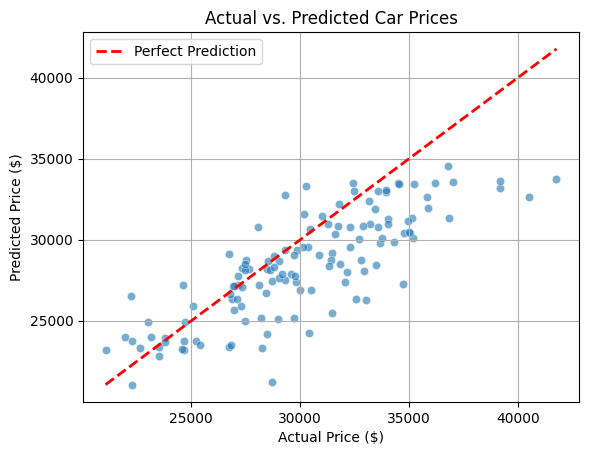

In [ ]:
for_model = RandomForestRegressor(random_state = 42, n_jobs = -1)

for_model.fit(X_train, y_train)

for_pred = for_model.predict(X_test)

rmse = root_mean_squared_error(for_pred, y_test)
mae = mean_absolute_error(for_pred, y_test)
r2 = r2_score(for_pred, y_test)

print(f"Mean Squared Error: {rmse: .2f}")

print(f"Mean Absolute Error: {mae: .2f}"  )

print(f"r2 Score: {r2:.2f}")

sns.scatterplot(x=y_test, y=for_pred, alpha=0.6)

# Add a line for perfect predictions (where predicted price equals actual price)
# This helps to visually assess the accuracy of the model.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2, label='Perfect Prediction')

# Set labels and title for clarity
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs. Predicted Car Prices')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

Since we split the dataset by time, we can draw a simple plot over time to show our predictions, notice that we can go into details for each brand, and in this case we chose BMW. The model still has some error, but it did predict the downward and the upward trend of the actual data

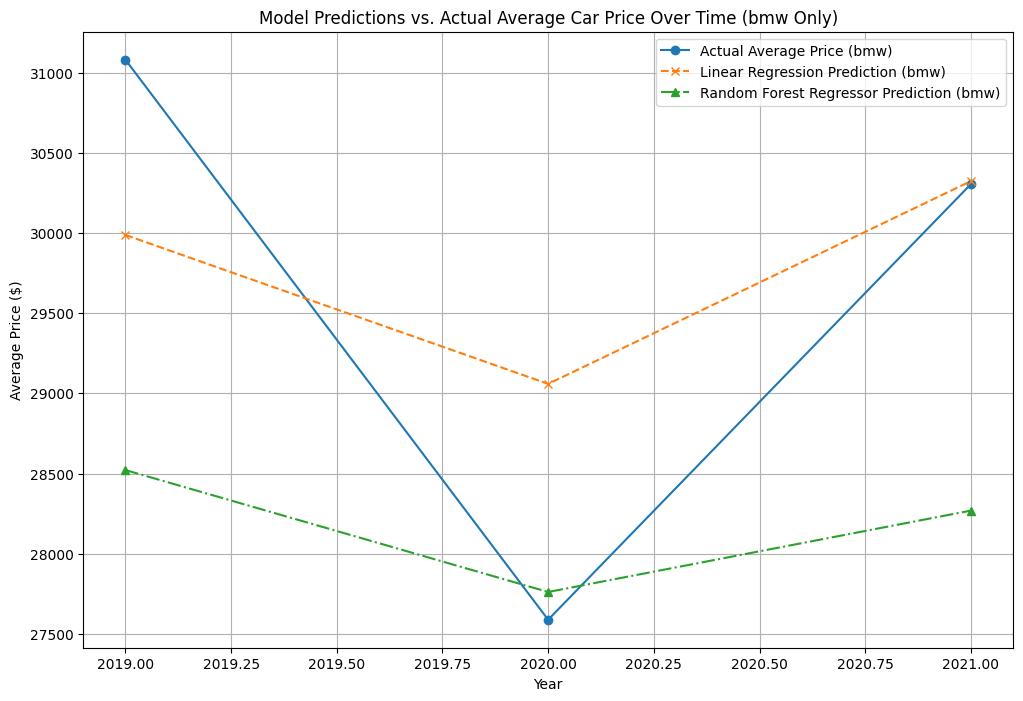

In [ ]:
results = pd.DataFrame(
    {
      'year' : X_test['Year'],
      'isBMW' : X_test['Make_BMW'],
      'isFord' : X_test['Make_Ford'],
      'isHonda': X_test['Make_Honda'],
      'isToyota': X_test['Make_Toyota'],
      'Actual_price': y_test,
     'lin' : lin_pred,
     'ran': for_pred
     })


# Filter the results to include only 1 Brand
bmw_results_df = results[results['isBMW'] == True].copy()

# This smooths out the data to show the trend more clearly.
yearly_avg_prices = bmw_results_df.groupby('year').mean()

# 4. Create the plot
plt.figure(figsize=(12, 8))

# Plot
plt.plot(yearly_avg_prices.index, yearly_avg_prices['Actual_price'], marker='o', linestyle='-', label='Actual Average Price (bmw)')
plt.plot(yearly_avg_prices.index, yearly_avg_prices['lin'], marker='x', linestyle='--', label='Linear Regression Prediction (bmw)')
plt.plot(yearly_avg_prices.index, yearly_avg_prices['ran'], marker='^', linestyle='-.', label='Random Forest Regressor Prediction (bmw)')


# Add labels, title, and legend for clarity
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.title('Model Predictions vs. Actual Average Car Price Over Time (bmw Only)')
plt.legend()
plt.grid(True)


plt.show()

Both routes return a decent results for both route with the first route having the better results (r2 score ranges from 0.76-0.79), as the second route results seems to lag behind (r2 score couldn't reach 0.6 for both model)

Additionally the Linear Regression model seems to outperform Random Forest Regressor on both route with its lower error and higher r2 score

